In [31]:
#Main Libraries
import os
import pandas as pd
import numpy as np
import random
import string
import os
import random
import glob

#Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
seed=11


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Final_Code_Backup_16th_August/ASL_Alphabet_Prediction_Using_CNN_code/ASL_Detection_Using_CNN_final_architecture_model.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       73984     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                    

In [34]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
# train_len = images_per_class* len(labels)  # As 10 images will be selected randomly for all the 29 classes
# train_len

In [35]:
TRAIN_PATH = "/content/drive/MyDrive/ASL_Dataset/asl_alphabet_train/asl_alphabet_train"
TEST_PATH= "/content/drive/MyDrive/ASL_Dataset_sample/asl_alphabet_test/asl_alphabet_test"
SAMPLE_FOLDER_ASL="/content/drive/MyDrive/ASL_Dataset/Sample_Folder"
DUMP_FOLDER_PATH="/content/drive/MyDrive/Dissertation Work/Generated_Data_For_ASL"
# TRAIN_PATH = "/content/drive/MyDrive/ASL_Dataset_sample/asl_alphabet_train/asl_alphabet_train/"

My_Image_Path="/content/drive/MyDrive/ASL_Dataset_sample/Test_Real_Samples"

In [36]:
# Create an empty list to store the paths
path_list = []

path_to_traverse=My_Image_Path
# Loop through all the files and subdirectories in the given folder
for root, dirs, files in os.walk(path_to_traverse):
    for file in files:
        file_path = os.path.join(root, file)
        path_list.append(file_path)

print(len(path_list))
for path in path_list:
    print(path)

5
/content/drive/MyDrive/ASL_Dataset_sample/Test_Real_Samples/Image_27_08_2023_07_12_29.jpg
/content/drive/MyDrive/ASL_Dataset_sample/Test_Real_Samples/Image_27_08_2023_07_12_27.jpg
/content/drive/MyDrive/ASL_Dataset_sample/Test_Real_Samples/Image_27_08_2023_07_12_30.jpg
/content/drive/MyDrive/ASL_Dataset_sample/Test_Real_Samples/Image_27_08_2023_07_12_22.jpg
/content/drive/MyDrive/ASL_Dataset_sample/Test_Real_Samples/Image_27_08_2023_07_12_24.jpg


In [37]:
def data_augmentation(test_img_path,imageSize):
    image_paths_list = test_img_path

    train_len=len(test_img_path)
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    cnt = 0

    for img_file in image_paths_list:
      img_file_path = str(img_file)
      img = cv2.imread(img_file_path)
      # print(img)
      img = skimage.transform.resize(img, (imageSize, imageSize, 3))
      img_arr = np.asarray(img).reshape((-1, imageSize, imageSize, 3))
      X[cnt] = img_arr
      cnt += 1
    return X


X_test = data_augmentation(path_list,imageSize)
print("Images successfully imported...")


Images successfully imported...


In [38]:
print("The shape of X_test is : ", X_test.shape)

The shape of X_test is :  (5, 64, 64, 3)


In [39]:
print("The shape of one image is : ", X_test[0].shape)

The shape of one image is :  (64, 64, 3)


In [40]:
predictions = new_model.predict(X_test)
print("Predictions done...")

1/1 [==============================] - 0s 242ms/step
Predictions done...


In [41]:
label_mapping={'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [42]:
# Convert predictions to class labels by selecting the class with the highest probability
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

predicted_labels = np.argmax(predictions, axis=1)

# Reversing key-value pairs using dictionary comprehension
reversed_dict = {value: key for key, value in label_mapping.items()}

print(predicted_labels)

predicted_labels_keys = [reversed_dict[label] for label in predicted_labels]
print(predicted_labels_keys)

[10 10 10 10 10]
['K', 'K', 'K', 'K', 'K']


In [43]:
# Display the first image in the training data (X_train) using the 'plt.imshow' function.
# plt.imshow(X_test[0])

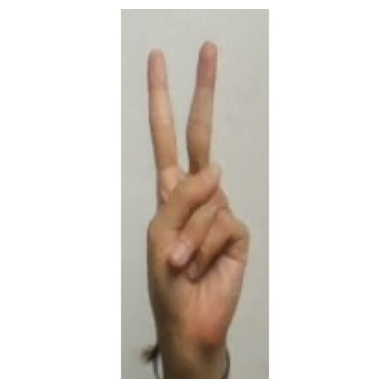

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = path_list[0]
image = mpimg.imread(image_path)

plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

Predicted Label: K


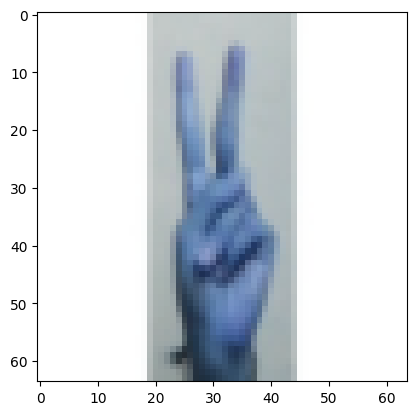

In [45]:
predicted_labels_keys = [reversed_dict[label] for label in predicted_labels]
print("Predicted Label:", predicted_labels_keys[0])

# Display the first image in the training data (X_train) using the 'plt.imshow' function.
plt.imshow(X_test[0])

# Display the plot.
plt.show()